In [325]:
import numpy as np
import matplotlib.pyplot as plt
from methods import Compute_B, Compute_Vpar_Vperp
from scipy.constants import c, m_e, m_p
import scipy
import pandas as pd

In [326]:
# constants
Re = 6378137
B0 = 3.07e-5                        
B0_Re3 = B0 * (Re**3)               
c2 = c**2    

In [327]:
# filename = "new_results/protons/proton_trajectory_1.0e+07_45_dt1.0e-03.csv"
filename2 = "new_results/protons/proton_trajectory_1.0e+02_45_dt1.0e-03_RungeKutta4.csv"
filename = "new_results/electrons/electron_trajectory_1.0e+07_5_dt1.0e-05_Boris.csv"


proton = pd.read_csv(filename)
proton2 = pd.read_csv(filename2)

In [328]:
proton["Bx"], proton["By"], proton["Bz"] = Compute_B(proton["x"], proton["y"], proton["z"])
proton2["Bx"], proton2["By"], proton2["Bz"] = Compute_B(proton2["x"], proton2["y"], proton2["z"])

In [329]:
proton["vpar"], proton["vperp"] = Compute_Vpar_Vperp(proton["vx"], proton["vy"], proton["vz"], proton["Bx"], proton["By"], proton["Bz"])
proton2["vpar"], proton2["vperp"] = Compute_Vpar_Vperp(proton2["vx"], proton2["vy"], proton2["vz"], proton2["Bx"], proton2["By"], proton2["Bz"])

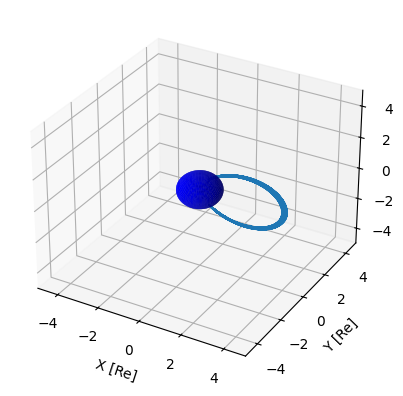

In [330]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(proton["x"]/Re, proton["y"]/Re, proton["z"]/Re)
ax.set_xlabel('X [Re]')
ax.set_ylabel('Y [Re]')
ax.set_zlabel('Z [Re]')
# add Earth
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
plt.show()

In [331]:
# 1st Invariant mu
proton["v"] = np.sqrt(proton["vx"]**2 + proton["vy"]**2 + proton["vz"]**2)
proton["B"] = np.sqrt(proton["Bx"]**2 + proton["By"]**2 + proton["Bz"]**2)
proton["gamma"] = 1/np.sqrt(1 - (proton["v"]**2/c2))

proton["mu"] = proton["gamma"] * m_p * proton["vperp"]**2 / (2 * proton["B"])

In [332]:
# 1st Invariant mu
proton2["v"] = np.sqrt(proton2["vx"]**2 + proton2["vy"]**2 + proton2["vz"]**2)
proton2["B"] = np.sqrt(proton2["Bx"]**2 + proton2["By"]**2 + proton2["Bz"]**2)
proton2["gamma"] = 1/np.sqrt(1 - (proton2["v"]**2/c2))

proton2["mu"] = proton2["gamma"] * m_p * proton2["vperp"]**2 / (2 * proton2["B"])

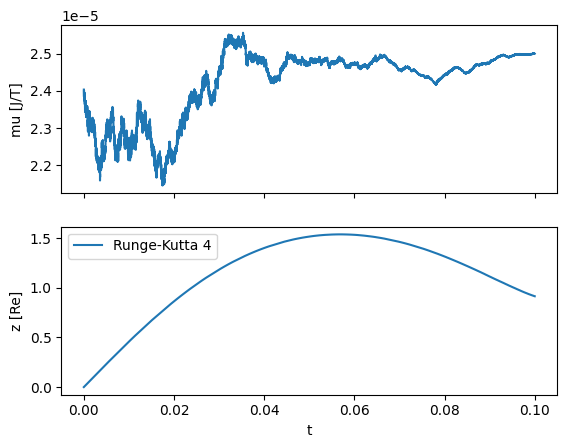

In [333]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(proton["t"][:10000], proton["mu"][:10000], label = "Runge-Kutta 4")
# ax[0].plot(proton2["t"][:10000], proton2["mu"][:10000], label = "Boris") 
ax[0].set_ylabel("mu [J/T]")
ax[1].plot(proton["t"][:10000], proton["z"][:10000]/Re, label = "Runge-Kutta 4")
# ax[1].plot(proton2["t"][:10000], proton2["z"][:10000]/Re, label = "Boris")
ax[1].set_ylabel("z [Re]")
ax[1].set_xlabel("t")
plt.legend()
plt.show()
# plt.ylim(0, 4e-6)